## **Iniciamos con la importación de librerías a utilizar**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz

In [3]:
# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv('/content/BASE.csv', encoding='latin-1', sep=';')

# Ver las primeras 5 filas del DataFrame
print(data.head())

  lugar_presenta          proceso     genero  \
0            UIO  OFICIAL DE ARMA  MASCULINO   
1            GYE  OFICIAL DE ARMA  MASCULINO   
2            GYE  OFICIAL DE ARMA  MASCULINO   
3            GYE  OFICIAL DE ARMA   FEMENINO   
4            GYE  OFICIAL DE ARMA  MASCULINO   

                               colegio  prof_padre  \
0  COLEGIO MILITAR TENIENTE HUGO ORTIZ    MECANICO   
1             LICEO NAVAL DE GUAYAQUIL     MILITAR   
2             LICEO NAVAL DE GUAYAQUIL     MILITAR   
3             LICEO NAVAL DE GUAYAQUIL  ECONOMISTA   
4      UNIDAD EDUCATIVA EUGENIO ESPEJO     MILITAR   

                       prof_madre  calificacion_carpeta  meritos  \
0                       INGENIERA                  86.1     1.01   
1                      ODONTÓLOGA                  78.0     0.20   
2  Master en psicología educativa                  78.0     0.20   
3                      ECONOMISTA                  80.0     0.20   
4                       BACHILLER             

In [4]:
# Convertimos a variables categóricas
data['lugar_presenta'] = data['lugar_presenta'].astype('object')
data['proceso'] = data['proceso'].astype('object')
data['genero'] = data['genero'].astype('object')
data['colegio'] = data['colegio'].astype('object')
data['prof_padre'] = data['prof_padre'].astype('object')
data['prof_madre'] = data['prof_madre'].astype('object')
data['aptitud_med'] = data['aptitud_med'].astype('object')
data['ppff'] = data['ppff'].astype('object')
data['visita_dom'] = data['visita_dom'].astype('object')



## **Realizamos el tratamiento de datos con estadística descriptiva**

In [5]:
# Estadísticas básicas de las variables numéricas
data.describe()

,calificacion_carpeta,meritos,inteligencia,promedio_acad,calificacion,apto
count,383.000000,382.000000,381.000000,383.000000,380.000000,383.000000
mean,63.410966,0.104293,109.146982,12.404178,9.561737,0.584856
std,11.319863,0.176864,18.914473,1.596998,1.096123,0.493391
min,0.000000,0.000000,0.000000,8.600000,6.350000,0.000000
25%,54.600000,0.000000,97.000000,11.325000,8.820000,0.000000
50%,63.000000,0.000000,108.000000,12.350000,9.560000,1.000000
75%,71.900000,0.200000,129.000000,13.475000,10.352500,1.000000
max,86.800000,1.010000,132.000000,17.600000,12.880000,1.000000


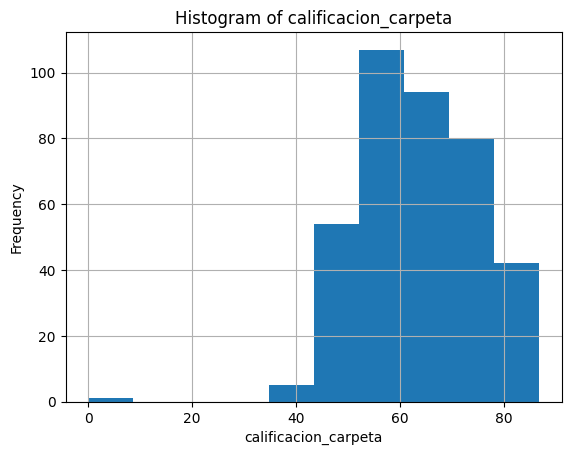

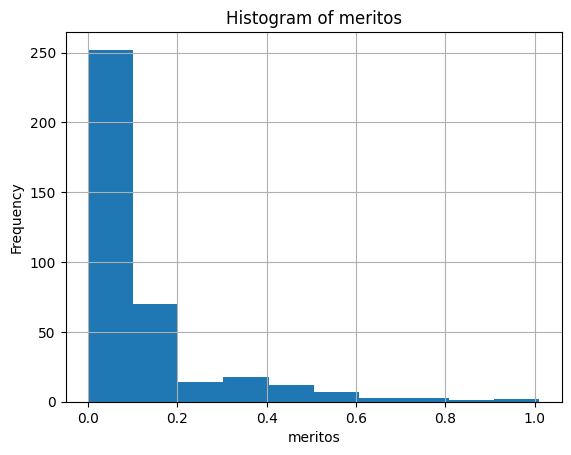

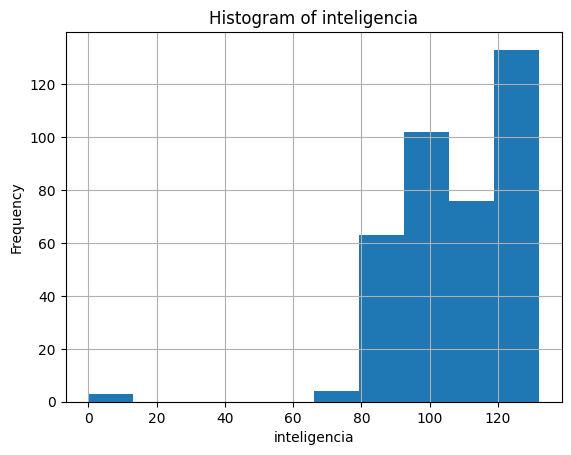

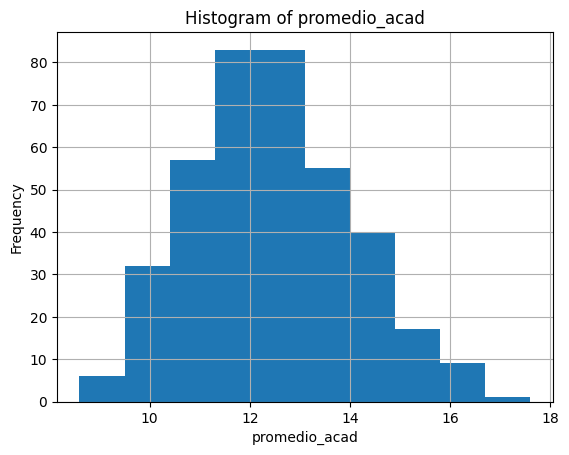

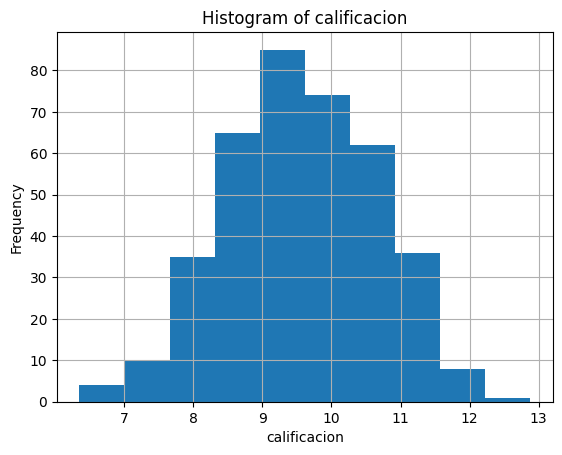

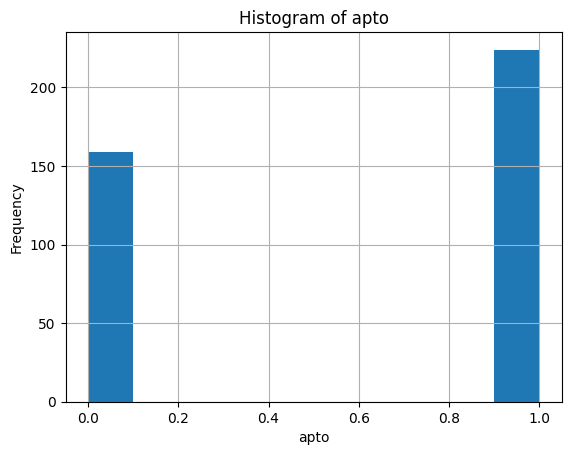

<Figure size 640x480 with 0 Axes>

In [6]:
# Histogramas de las variables numéricas
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col].hist()
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {col}")
        plt.show()
        plt.clf()  # Clear plot for next iteration

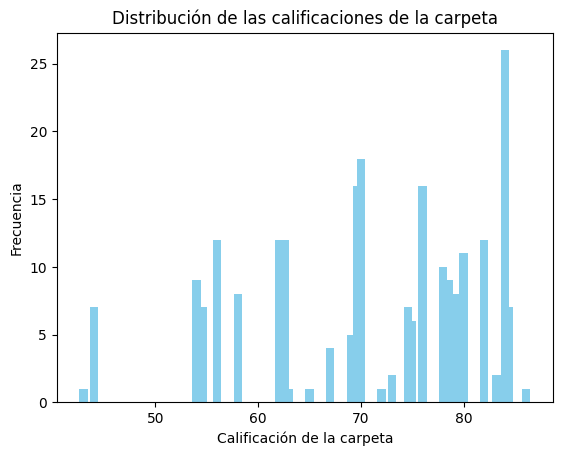

In [7]:
# Agrupa por 'apto' y cuenta las frecuencias
data['frecuencia'] = data['calificacion_carpeta'].value_counts()

# Crea el diagrama de barras para 'calificacion_carpeta'
plt.bar(data['calificacion_carpeta'], data['frecuencia'], color='skyblue')
plt.xlabel('Calificación de la carpeta')
plt.ylabel('Frecuencia')
plt.title('Distribución de las calificaciones de la carpeta')
plt.show()

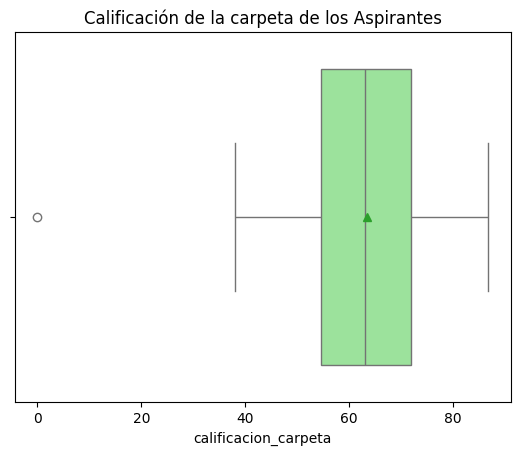

In [8]:
# Diagrama de caja para 'calificacion_carpeta'
sns.boxplot(x='calificacion_carpeta', data=data, showmeans=True, color='lightgreen')
plt.title('Calificación de la carpeta de los Aspirantes')
plt.show()